### Predict whether the cancer is benign or malignant with Adaboost 

- Data source： https://www.kaggle.com/uciml/breast-cancer-wisconsin-data  

In [1]:
# necessary imports
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

np.random.seed(19)

In [2]:
data_folder = ""
data = pd.read_csv(os.path.join(data_folder, "breastCancer.csv"))

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### Drop useless information

In [5]:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)

#### Transfer   M：1， B：-1

In [6]:
data['diagnosis'] = data['diagnosis'].apply(lambda x : +1 if x=='M' else -1)

#### Investigate data

In [7]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,-0.254833,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.967836,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,-1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,-1.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,-1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

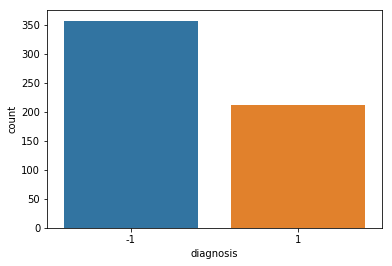

In [9]:
import seaborn as sns
sns.countplot(data['diagnosis'])

#### Select 6 features

In [10]:
features = data.columns[1:7]
target = 'diagnosis'
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean'],
      dtype='object')

#### Investigate relationship between features and cancer  

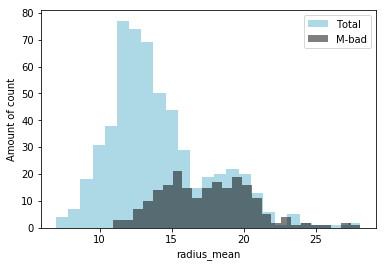

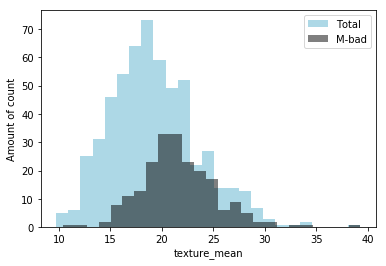

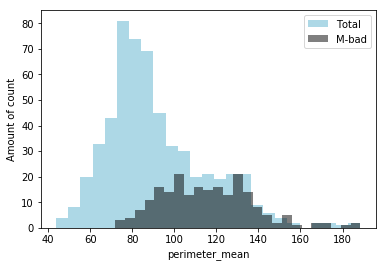

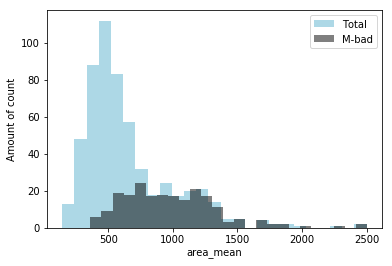

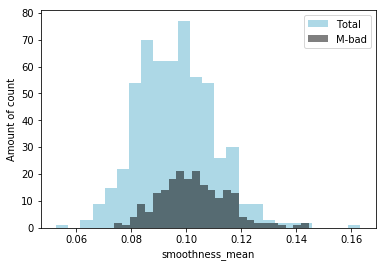

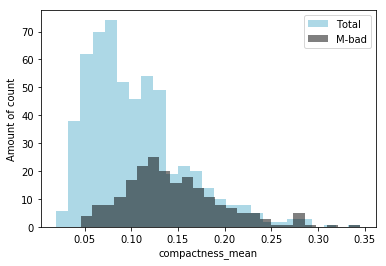

In [11]:
i = 0
for feature in features:

    bins = 25
    
    plt.hist(data[feature], bins=bins, color='lightblue', label= 'Total', alpha=1)
    plt.hist(data[feature][data[target] == 1], bins=bins, color='k', label='M-bad', alpha=0.5)
    
    plt.xlabel(feature)
    plt.ylabel('Amount of count')
    
    plt.legend()
    
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.3)

In [13]:
trainX, trainY = train_data[data.columns[1:]], train_data[target]
testX, testY = test_data[data.columns[1:]], test_data[target]

### Logistic Regression

In [14]:
logistic_model = LogisticRegression()
print("Logistic Regression performance: %f" % (cross_val_score(logistic_model, trainX, trainY, cv=8).mean()))

Logistic Regression performance: 0.947143


### Decision Tress

In [15]:
tree_model = DecisionTreeClassifier()
print("Decision Tree performance: %f" % (cross_val_score(tree_model, trainX, trainY, cv=8).mean()))

Decision Tree performance: 0.899388


### Adaboost

In [16]:
ada_model = AdaBoostClassifier(n_estimators=200)
print("Decision Tree performance: %f" % (cross_val_score(ada_model, trainX, trainY, cv=8).mean()))

Decision Tree performance: 0.967347


### Performance on testing data

In [17]:
logistic_model = LogisticRegression()
logistic_model.fit(trainX, trainY)
print("Logistic Regression test performance: %f" % logistic_model.score(testX, testY))

Logistic Regression test performance: 0.953216


In [18]:
tree_model = DecisionTreeClassifier()
tree_model.fit(trainX, trainY)
print("Decision Tree test performance: %f" % tree_model.score(testX, testY))

Decision Tree test performance: 0.923977


In [19]:
ada_model = AdaBoostClassifier(n_estimators=200)
ada_model.fit(trainX, trainY)
print("Adaboost test performance: %f" % ada_model.score(testX, testY))

Adaboost test performance: 0.953216


#### Implementing Adaboost

In [20]:
from sklearn.base import BaseEstimator
class Adaboost(BaseEstimator):
    
    def __init__(self, M):
        self.M = M
        
    def fit(self, X, Y):
        self.models = []
        self.model_weights = []
        
        N, _ = X.shape
        alpha = np.ones(N) / N
        
        for m in range(self.M):
            tree = DecisionTreeClassifier(max_depth=2)
            tree.fit(X, Y, sample_weight=alpha)
            prediction = tree.predict(X)
            
            
            weighted_error = alpha.dot(prediction != Y)
            
            
            model_weight = 0.5 * (np.log(1 - weighted_error) - np.log(weighted_error))
            
            
            alpha = alpha * np.exp(-model_weight * Y * prediction)
            
            
            alpha = alpha / alpha.sum()
            
            self.models.append(tree)
            self.model_weights.append(model_weight)
            
    def predict(self, X):
        N, _ = X.shape
        result = np.zeros(N)
        for wt, tree in zip(self.model_weights, self.models):
            result += wt * tree.predict(X)
        
        return np.sign(result)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return np.mean(prediction == Y)

### Performance of Adaboost on training data

In [21]:
adamodel = Adaboost(200)
print("Adaboost model performance: %f" % (cross_val_score(adamodel, trainX.as_matrix().astype(np.float64), trainY.as_matrix().astype(np.float64), cv=8).mean()))

Adaboost model performance: 0.972449


### Performance of Adaboost on testing data

In [22]:
adamodel.fit(trainX.as_matrix().astype(np.float64), trainY.as_matrix().astype(np.float64))
print("Adaboost model test performance: %f" % adamodel.score(testX.as_matrix().astype(np.float64), testY.as_matrix().astype(np.float64)))

Adaboost model test performance: 0.941520
